# Spaceship Titanic

kaggle : https://www.kaggle.com/competitions/spaceship-titanic/overview

```
PassengerId - 각 승객의 고유 ID
HomePlanet - 승객이 출발한 행성 (승객의 고향)
CryoSleep - 승객의 냉동수면 여부? CyroSleep 중인 승객은 객실에 갇혀 있음
Cabin - 객실 번호 (deck/num/side), side = Port=P(좌현), Starboard=S(우현)
Destination - 승객의 목적지
Age - 승객의 나이
VIP - VIP 여부
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - 승객이 각종 편의시설에 대해 지불한 금액
Name - 승객의 이름
Transported - 승객이 다른 차원으로 이동했는지 여부. 이 문제의 타겟, 예측해야할 목표.
```

## 문제 정의
- 문제 유형 : **Spaceship Titanic**은 어떤 승객이 이상 현상에 의해 다른 차원으로 전송되었는지 예측해야한다. 다른 차원으로 넘어갔는가 / 넘어가지 않았는가를 분류하는 **이진 분류 문제**다.

## 탐색적 데이터 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
ST_test = pd.read_csv('./datasets/test.csv')
ST_train = pd.read_csv('./datasets/train.csv')
ST_submission = pd.read_csv('./datasets/sample_submission.csv')

In [3]:
ST_test.shape, ST_train.shape

((4277, 13), (8693, 14))

### 데이터 훑어보기

In [4]:
ST_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
ST_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
ST_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
ST_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


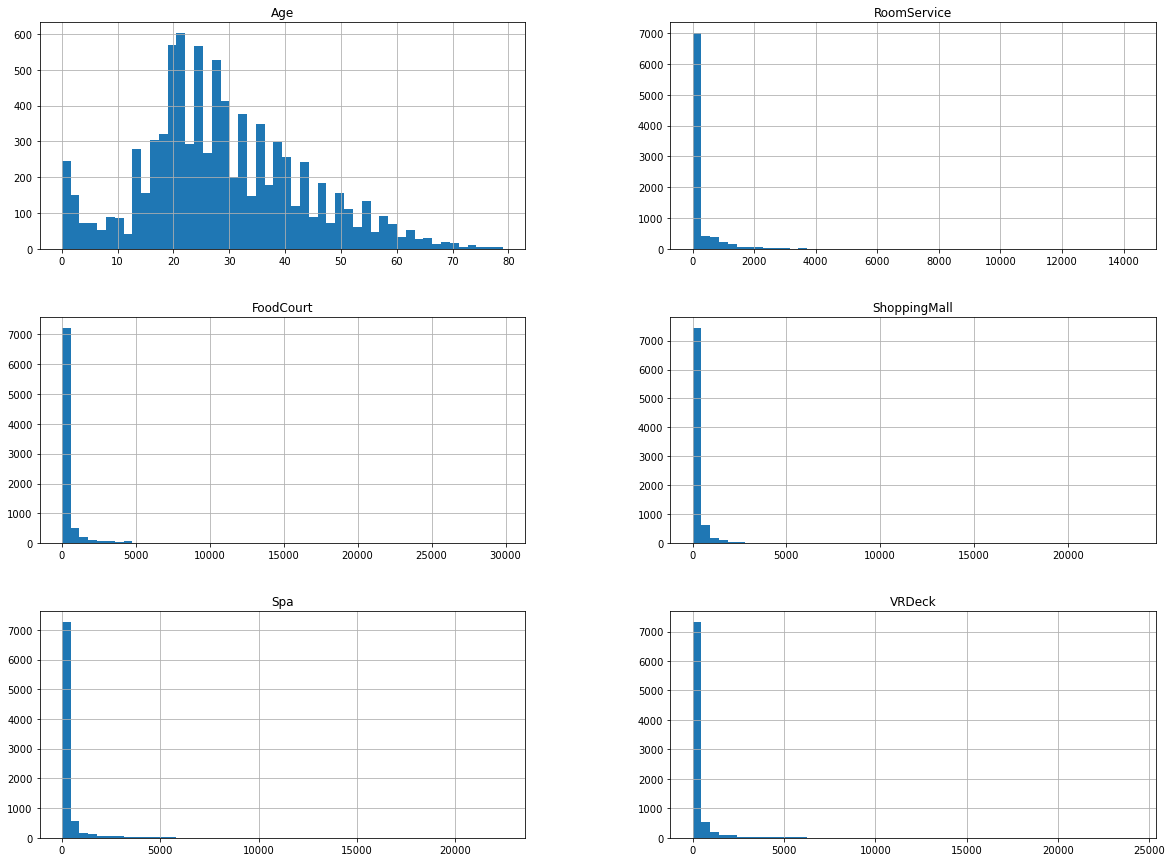

In [8]:
ST_hist = ST_train.hist(bins=50, figsize=(20, 15))

In [9]:
ST_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
# PassengerId를 인덱스로 설정
ST_train.set_index('PassengerId',inplace=True)
ST_test.set_index('PassengerId',inplace=True)

In [11]:
ST_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [12]:
ST_train.describe(include='object')

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8492,8476,8494,8511,8490,8493
unique,3,2,6560,3,2,8473
top,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,4602,5439,8,5915,8291,2


In [13]:
ST_train.duplicated().sum() # 중복데이터는 없음

0

### 데이터 시각화 & 전처리

In [14]:
# 누락데이터는 어떻게 처리하는게 좋을까?
# 승객이 지불한 각종 편의시설에 대한 수치는 아예 한 칼럼으로 합치는게 좋을까?
# 삭제해도 좋을 칼럼은 뭐가 있을까? (필요없는 특성 찾기)
# 범주형 데이터들은 더미변수로 원핫인코딩을 해야

In [15]:
ST_train.isnull().sum() # 승객 id와 타겟 외의 모든 열에 누락데이터 있음!

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [16]:
# 수치형은 중앙값, 범주형은 최빈값으로 결측치를 채워보자
# name 컬럼은 확실히 삭제하는게 좋을 듯

In [17]:
# 수치형 중 Age를 제외한 나머지 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck' 는 중앙값이 모두 0임
ST_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = ST_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
ST_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = ST_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [18]:
# 수치형 Age의 결측값은 중앙값으로 대체
ST_train['Age'] =ST_train['Age'].fillna(ST_train['Age'].median())
ST_test['Age'] =ST_test['Age'].fillna(ST_test['Age'].median())

In [19]:
# 범주형의 결측값은 최빈값으로 대체 (.mode()를 썼더니 안채워진다 describe에서 본 정보를 기입하자...)
ST_train['HomePlanet'] = ST_train['HomePlanet'].fillna('Earth')
ST_test['HomePlanet'] = ST_test['HomePlanet'].fillna('Earth')

ST_train['CryoSleep'] = ST_train['CryoSleep'].fillna(False)
ST_test['CryoSleep'] = ST_test['CryoSleep'].fillna(False)

ST_train['Destination'] = ST_train['Destination'].fillna('TRAPPIST-1e')
ST_test['Destination'] = ST_test['Destination'].fillna('TRAPPIST-1e')

ST_train['VIP'] = ST_train['VIP'].fillna(False)
ST_test['VIP'] = ST_test['VIP'].fillna(False)

In [20]:
# 전체적으로 각 컬럼별 결측값은 전체 데이터의 2% 안팎으로 적은 양임(다른 값으로 대체해도 엄청난 영향을 주지 않을 거라 추측)
# Cabin(객실) 결측치의 경우, 최선책은 Cabin의 값이 있는 데이터와 없는 데이터로 나누고 결측 데이터를 예측하는 모델을 만드는 것
# 하지만 당장은 어떻게 해야할지 머리가 복잡해서 일단 최빈값을 넣고 추후 수정해보는 것으로!

In [21]:
ST_train['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [22]:
ST_train['Cabin'] = ST_train['Cabin'].fillna('G/734/S')
ST_test['Cabin'] = ST_test['Cabin'].fillna('G/734/S')

In [23]:
# name 특성 삭제
ST_train = ST_train.drop('Name', axis='columns')
ST_test = ST_test.drop('Name', axis='columns')

In [24]:
ST_train.shape, ST_test.shape

((8693, 12), (4277, 11))

In [25]:
ST_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [26]:
# 원핫 인코딩 전, Cabin열을 어떻게 처리해야할지에 대한 고민 필요 (이상태로 원핫인코딩에 들어가면 무수한 컬럼이 추가될 듯...)
# Deck, Num, Side 를 '/'로 스플릿해서 열을 추가하자

In [27]:
ST_train[['Deck', 'Num', 'Side']] = ST_train.Cabin.str.split('/', expand=True) 
ST_test[['Deck', 'Num', 'Side']] = ST_test.Cabin.str.split('/', expand=True) 

In [28]:
# Cabin 특성 삭제
ST_train = ST_train.drop('Cabin', axis='columns')
ST_test = ST_test.drop('Cabin', axis='columns')

In [29]:
ST_train.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Deck',
       'Num', 'Side'],
      dtype='object')

In [30]:
ST_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8693 non-null   object 
 12  Num           8693 non-null   object 
 13  Side          8693 non-null   object 
dtypes: bool(3), float64(6), object(5)
memory usage: 840.4+ KB


In [31]:
# Cabin(Deck, Num, Side) 가 Transported에 영향을 주는지 확인

<AxesSubplot:xlabel='Deck', ylabel='count'>

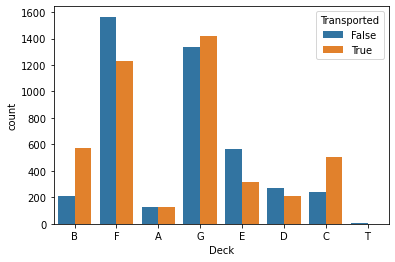

In [32]:
# Deck : F와 G의 True값이 월등히 높음
sns.countplot(data=ST_train, x='Deck', hue='Transported')

<AxesSubplot:xlabel='Num', ylabel='count'>

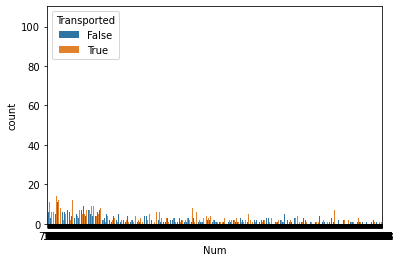

In [33]:
# Num : 값이 너무 많다... 
sns.countplot(data=ST_train, x='Num', hue='Transported')

In [34]:
ST_train['Num'].value_counts()

734     208
82       28
86       22
19       22
56       21
       ... 
1644      1
1515      1
1639      1
1277      1
1894      1
Name: Num, Length: 1817, dtype: int64

<AxesSubplot:xlabel='Side', ylabel='count'>

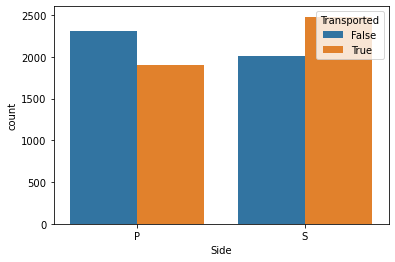

In [35]:
# Side : 좌현보다는 우현의 전송률(?)이 조금 더 높음
sns.countplot(data=ST_train, x='Side', hue='Transported')

<AxesSubplot:ylabel='Transported'>

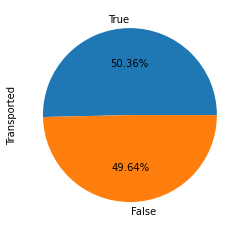

In [36]:
# 다른 차원으로 전송된 사람과 그렇지 않은 사람의 비율은 반반
# 이는 캐글의 문제에서도 명시되어있었던 사항
data = ST_train['Transported'].value_counts()
data.plot(kind='pie', autopct='%.2f%%')

<AxesSubplot:xlabel='Age_cat', ylabel='count'>

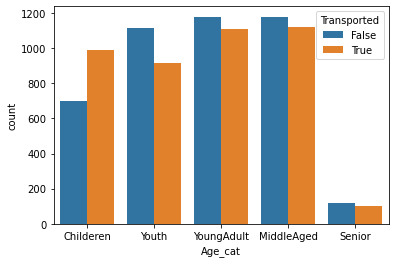

In [37]:
# Age도 얼만큼 영향을 끼치는지 확인
bins = [0, 18, 25, 35, 60, 80]
group_names = ['Childeren', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
ST_train['Age_cat'] = pd.cut(ST_train['Age'], bins, labels=group_names)
ST_test['Age_cat'] = pd.cut(ST_test['Age'], bins, labels=group_names)

sns.countplot(data=ST_train, x='Age_cat', hue='Transported')
# Childeren의 True값이 False값에 비해서 다른 특성들과 비교했을 때 조금 더 차이가 많이 난다

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

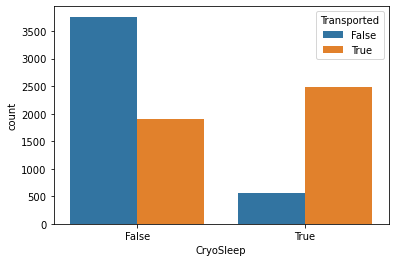

In [38]:
# 냉동수면에 들어간 사람들의 전송률이 더 높다! 유의미한 값
sns.countplot(data=ST_train, x='CryoSleep', hue='Transported')

In [39]:
ST_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    8693 non-null   object  
 1   CryoSleep     8693 non-null   bool    
 2   Destination   8693 non-null   object  
 3   Age           8693 non-null   float64 
 4   VIP           8693 non-null   bool    
 5   RoomService   8693 non-null   float64 
 6   FoodCourt     8693 non-null   float64 
 7   ShoppingMall  8693 non-null   float64 
 8   Spa           8693 non-null   float64 
 9   VRDeck        8693 non-null   float64 
 10  Transported   8693 non-null   bool    
 11  Deck          8693 non-null   object  
 12  Num           8693 non-null   object  
 13  Side          8693 non-null   object  
 14  Age_cat       8515 non-null   category
dtypes: bool(3), category(1), float64(6), object(5)
memory usage: 1.1+ MB


In [40]:
ST_train['Pay'] = ST_train['RoomService'] + ST_train['FoodCourt'] + ST_train['ShoppingMall'] + ST_train['Spa'] + ST_train['VRDeck']
ST_test['Pay'] = ST_test['RoomService'] + ST_test['FoodCourt'] + ST_test['ShoppingMall'] + ST_test['Spa'] + ST_test['VRDeck']

In [41]:
ST_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Age_cat,Pay
PassengerId,,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,MiddleAged,0.0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,Youth,736.0
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,MiddleAged,10383.0
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,YoungAdult,5176.0
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,Childeren,1091.0


In [42]:
# 삭제할 특성 생각...
# 우선 새로운 특성을 만드는데 합쳤던 기존의 특성들 삭제
# Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
# Num 특성도 삭제

In [43]:
ST_train.drop(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num'], axis=1, inplace=True)
ST_test.drop(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num'], axis=1, inplace=True)

In [44]:
ST_train.head()

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,Side,Age_cat,Pay
PassengerId,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,False,False,B,P,MiddleAged,0.0
0002_01,Earth,False,TRAPPIST-1e,False,True,F,S,Youth,736.0
0003_01,Europa,False,TRAPPIST-1e,True,False,A,S,MiddleAged,10383.0
0003_02,Europa,False,TRAPPIST-1e,False,False,A,S,YoungAdult,5176.0
0004_01,Earth,False,TRAPPIST-1e,False,True,F,S,Childeren,1091.0


In [45]:
ST_test.head()

,HomePlanet,CryoSleep,Destination,VIP,Deck,Side,Age_cat,Pay
PassengerId,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,False,G,S,YoungAdult,0.0
0018_01,Earth,False,TRAPPIST-1e,False,F,S,Youth,2832.0
0019_01,Europa,True,55 Cancri e,False,C,S,YoungAdult,0.0
0021_01,Europa,False,TRAPPIST-1e,False,C,S,MiddleAged,7418.0
0023_01,Earth,False,TRAPPIST-1e,False,F,S,Youth,645.0


### 인코딩

In [46]:
# 더미변수화 (원핫인코딩)
ST_train_dum = pd.get_dummies(ST_train)
ST_test_dum = pd.get_dummies(ST_test)

In [47]:
ST_test_dum.head()

,CryoSleep,VIP,Pay,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,...,Deck_F,Deck_G,Deck_T,Side_P,Side_S,Age_cat_Childeren,Age_cat_Youth,Age_cat_YoungAdult,Age_cat_MiddleAged,Age_cat_Senior
PassengerId,,,,,,,,,,,,,,,,,,,,,
0013_01,True,False,0.0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
0018_01,False,False,2832.0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
0019_01,True,False,0.0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
0021_01,False,False,7418.0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
0023_01,False,False,645.0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0


## 데이터 준비

In [52]:
X = ST_train_dum.drop('Transported', axis=1)
y = ST_train_dum['Transported']

In [53]:
X.columns # Transported가 삭제된 것을 확인

Index(['CryoSleep', 'VIP', 'Pay', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Side_P', 'Side_S', 'Age_cat_Childeren', 'Age_cat_Youth',
       'Age_cat_YoungAdult', 'Age_cat_MiddleAged', 'Age_cat_Senior'],
      dtype='object')

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6954, 24), (1739, 24), (6954,), (1739,))

## 학습 방법 탐색

In [55]:
# 확률적 경사하강법
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

# 교차검증
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, scoring='accuracy', cv=3)

array([0.73425367, 0.5069025 , 0.74719586])

In [56]:
# 오차행렬
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

In [57]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

confusion_matrix(y_train, y_train_pred)

array([[1992, 1460],
       [ 885, 2617]], dtype=int64)

In [58]:
# 정밀도
precision_score(y_train, y_train_pred)

0.6418935491783174

In [59]:
# 재현율
recall_score(y_train, y_train_pred)

0.7472872644203312

In [60]:
# f1_score
f1_score(y_train, y_train_pred)

0.6905924264414831

In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [62]:
# 결정트리 (500개의 샘플)
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6969522714203565

In [63]:
# 배깅 (max_samples수가 100개)
bag_clf = BaggingClassifier(
            DecisionTreeClassifier(random_state=42), n_estimators= 500,
            max_samples=100, bootstrap=True, random_state=42, n_jobs=-1)

bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7389304197814837

In [64]:
# oob 평가 
bag_clf = BaggingClassifier(
            DecisionTreeClassifier(random_state=42), n_estimators= 500,
            max_samples=100, bootstrap=True, oob_score=True, random_state=42, n_jobs=-1)
bag_clf.fit(X_train, y_train)

bag_clf.oob_score_

0.7427379925222893

In [65]:
# 랜덤포레스트
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7406555491661875

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42, n_estimators = 500, max_depth=3)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7429557216791259

In [68]:
from sklearn.model_selection import GridSearchCV

gb_clf = GradientBoostingClassifier(random_state=42)

param_grid = {'n_estimators':[300, 400, 600], 'max_depth':[3, 5, 7, 9]} 

# GridSearchCV(모델, 탐색할파라미터, 성능측정기준, 폴드수)
grid_search = GridSearchCV(gb_clf, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': [300, 400, 600]},
             scoring='neg_mean_squared_error')

In [69]:
grid_search.best_params_

{'max_depth': 3, 'n_estimators': 300}

In [70]:
# bdst_params_를 참고해서 다시
gb_clf = GradientBoostingClassifier(random_state=42, n_estimators = 300, max_depth=3)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.745830937320299

### Deck 특성을 빼보고 다시 확인 (X2)

In [79]:
ST_train_dum.columns

Index(['CryoSleep', 'VIP', 'Transported', 'Pay', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Side_P', 'Side_S', 'Age_cat_Childeren', 'Age_cat_Youth',
       'Age_cat_YoungAdult', 'Age_cat_MiddleAged', 'Age_cat_Senior'],
      dtype='object')

In [80]:
X2 = ST_train_dum.drop(['Transported', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T'], axis=1)
y = ST_train_dum['Transported']

In [81]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

In [83]:
# 배깅 (max_samples수가 100개)
bag_clf = BaggingClassifier(
            DecisionTreeClassifier(random_state=42), n_estimators= 500,
            max_samples=100, bootstrap=True, random_state=42, n_jobs=-1)

bag_clf.fit(X2_train, y_train)

y_pred = bag_clf.predict(X2_test)
accuracy_score(y_test, y_pred)

0.7343300747556066

In [84]:
# 랜덤포레스트
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42, n_jobs=-1)
rnd_clf.fit(X2_train, y_train)
y_pred = rnd_clf.predict(X2_test)
accuracy_score(y_test, y_pred)

0.7372052903967797

In [85]:
gb_clf = GradientBoostingClassifier(random_state=42, n_estimators = 300, max_depth=3)
gb_clf.fit(X2_train, y_train)
y_pred = gb_clf.predict(X2_test)
accuracy_score(y_test, y_pred)

0.7297297297297297

- Deck 특성을 삭제하니까 점수가 더 낮아짐 

### VIP 특성을 빼보고 다시 확인 (X3)

In [88]:
X3 = ST_train_dum.drop(['Transported', 'VIP'], axis=1)
y = ST_train_dum['Transported']

In [89]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

In [91]:
# 배깅 (max_samples수가 100개)
bag_clf = BaggingClassifier(
            DecisionTreeClassifier(random_state=42), n_estimators= 500,
            max_samples=100, bootstrap=True, random_state=42, n_jobs=-1)

bag_clf.fit(X3_train, y_train)

y_pred = bag_clf.predict(X3_test)
accuracy_score(y_test, y_pred)

0.738355376653249

In [92]:
# 랜덤포레스트
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42, n_jobs=-1)
rnd_clf.fit(X3_train, y_train)
y_pred = rnd_clf.predict(X3_test)
accuracy_score(y_test, y_pred)

0.7441058079355952

In [93]:
gb_clf = GradientBoostingClassifier(random_state=42, n_estimators = 300, max_depth=3)
gb_clf.fit(X3_train, y_train)
y_pred = gb_clf.predict(X3_test)
accuracy_score(y_test, y_pred)

0.7435307648073606

- Deck 특성을 뺐던 X2보다는 높게 나왔지만 맨 처음 결과보다는 아주 조금 낮다

In [ ]:
-> 내일은 다시 처음부터 차근차근 해볼 것 (아예 새 노트북 파일 생성)
-> 베이스 라인 한번은 돌려봤으니 다음에는 다른 코드도 참고해보기
-> 파이프라인 만들어보기
-> 인코더, 스케일러도 제대로 사용해볼 것
-> 다양한 모델 적용하고 비교해보기 
--> 최종 목표는 모델의 성능 올리기: 0.745830937320299 에서 더 올리는게 목표